In [4]:
import pandas as pd
from glob import glob

In [54]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm

In [5]:
data_files = sorted(glob('C:/Users/User/Desktop/LoanData/LoanStats*.csv'))
data_files

['C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2016Q1.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2016Q2.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2016Q3.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2016Q4.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2017Q1.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2017Q2.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2017Q3.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2017Q4.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2018Q1.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2018Q2.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2018Q3.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2018Q4.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2019Q1.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2019Q2.csv',
 'C:/Users/User/Desktop/LoanData\\LoanStats_securev1_2019Q3.csv']

In [6]:
mergeddata = pd.concat(pd.read_csv(datafile).assign(sourcefilename = datafile)
                      for datafile in data_files)

C:\Users\User\AppData\Local\Temp\ipykernel_22636\3502216327.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  mergeddata = pd.concat(pd.read_csv(datafile).assign(sourcefilename = datafile)
C:\Users\User\AppData\Local\Temp\ipykernel_22636\3502216327.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  mergeddata = pd.concat(pd.read_csv(datafile).assign(sourcefilename = datafile)
C:\Users\User\AppData\Local\Temp\ipykernel_22636\3502216327.py:1: DtypeWarning: Columns (19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  mergeddata = pd.concat(pd.read_csv(datafile).assign(sourcefilename = datafile)
C:\Users\User\AppData\Local\Temp\ipykernel_22636\3502216327.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  mergeddata = pd.concat(pd.read_csv(datafile).assign(sourcefilename = datafile)
C:\Us

In [7]:
# this is how many rows pandas will show by default with methods like pd.dataframe.head()
pd.options.display.max_rows

60

In [9]:
# we want to increase it, because in this case there are a lot of column names
pd.options.display.max_rows = 1000

In [10]:
mergeddata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,sourcefilename
0,75710736,NaN,12800,12800,12800.0,36 months,11.99%,425.09,C,C1,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,C:/Users/User/Desktop/LoanData\LoanStats_secur...
1,76143686,NaN,9000,9000,9000.0,36 months,15.31%,313.36,C,C5,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,C:/Users/User/Desktop/LoanData\LoanStats_secur...
2,76143234,NaN,8000,8000,8000.0,36 months,10.75%,260.97,B,B4,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,C:/Users/User/Desktop/LoanData\LoanStats_secur...
3,76022756,NaN,25000,25000,25000.0,60 months,12.99%,568.70,C,C2,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,C:/Users/User/Desktop/LoanData\LoanStats_secur...
4,76143291,NaN,35000,35000,35000.0,60 months,18.25%,893.54,D,D3,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,C:/Users/User/Desktop/LoanData\LoanStats_secur...


In [11]:
#Dropping out Unnecessay columns
mergeddata.dropna(axis = 1,inplace = True)

In [12]:
mergeddata.shape

(1763061, 75)

In [13]:
list(mergeddata.columns)

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'addr_state',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_r

In [19]:
mergeddata.drop(['id','url','policy_code','application_type','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pub_rec_bankruptcies','tax_liens'],axis = 1,inplace = True)

In [21]:
mergeddata.drop(['hardship_flag','debt_settlement_flag','sourcefilename'],axis = 1,inplace = True)

In [23]:
mergeddata.shape

(1763061, 50)

# Question 1 - Monthwise Loan issued by lending club

In [24]:
mergeddata.issue_d.value_counts()

Mar-2016    61992
Jul-2019    50536
Aug-2019    47546
May-2018    46311
Oct-2018    46305
Aug-2018    46079
May-2019    45541
Sep-2019    44937
Apr-2019    43954
Jan-2019    43584
Aug-2017    43573
Jul-2018    43089
Apr-2018    42928
Nov-2017    42343
Nov-2018    41973
Jun-2019    41644
Jun-2018    41533
Dec-2018    40134
Sep-2017    39713
Feb-2016    39529
Jul-2017    39415
Sep-2018    39026
Mar-2018    38771
Dec-2017    38154
Oct-2017    38151
Jun-2017    38087
May-2017    37681
Mar-2017    37181
Apr-2016    36432
Jan-2018    36347
Aug-2016    36280
Dec-2016    36183
Mar-2019    36106
Feb-2019    35985
Jul-2016    34696
Nov-2016    34591
Jun-2016    33019
Oct-2016    32772
Feb-2018    32746
Jan-2016    32366
Jan-2017    31835
Apr-2017    29683
May-2016    28403
Sep-2016    28144
Feb-2017    27763
Name: issue_d, dtype: int64

In [44]:
mergeddata['issue_d_year'] = pd.DatetimeIndex(mergeddata['issue_d']).year  
mergeddata['issue_d_month'] = pd.DatetimeIndex(mergeddata['issue_d']).month
mergeddata = mergeddata.sort_values(by = ['issue_d_year', 'issue_d_month'])
display(mergeddata.head())

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,delinq_amnt,mort_acc,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,0,3,277748,105716,20500,90253,2016,1,18018.96,75.0790
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,0,1,159779,46885,35500,36030,2016,1,0.00,0.0000
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,0,3,63851,46225,2300,45551,2016,1,0.00,0.0000
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,0,0,76492,61418,24500,49956,2016,1,0.00,0.0000
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,0,4,32300,22946,15800,10000,2016,1,15220.38,76.1019


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'Jan-2016'),
  Text(1, 0, 'Feb-2016'),
  Text(2, 0, 'Mar-2016'),
  Text(3, 0, 'Apr-2016'),
  Text(4, 0, 'May-2016'),
  Text(5, 0, 'Jun-2016'),
  Text(6, 0, 'Jul-2016'),
  Text(7, 0, 'Aug-2016'),
  Text(8, 0, 'Sep-2016'),
  Text(9, 0, 'Oct-2016'),
  Text(10, 0, 'Nov-2016'),
  Text(11, 0, 'Dec-2016'),
  Text(12, 0, 'Jan-2017'),
  Text(13, 0, 'Feb-2017'),
  Text(14, 0, 'Mar-2017'),
  Text(15, 0, 'Apr-2017'),
  Text(16, 0, 'May-2017'),
  Text(17, 0, 'Jun-2017'),
  Text(18, 0, 'Jul-2017'),
  Text(19, 0, 'Aug-2017'),
  Text(20, 0, 'Sep-2017'),
  Text(21, 0, 'Oct-2017'),
  Text(22, 0, 'Nov-2017'),
  Text(23, 0, 'Dec-2017'),
  Text(24, 0, 'Jan-2018'),
  Text(25, 0, 'Feb-2018'),
  Text(26, 0, 'Mar-2018'),
  Text(27, 0, 'Apr-2018'),
  Text(28, 0, 'May-2018'),
  Text(29, 0, 'Jun-20

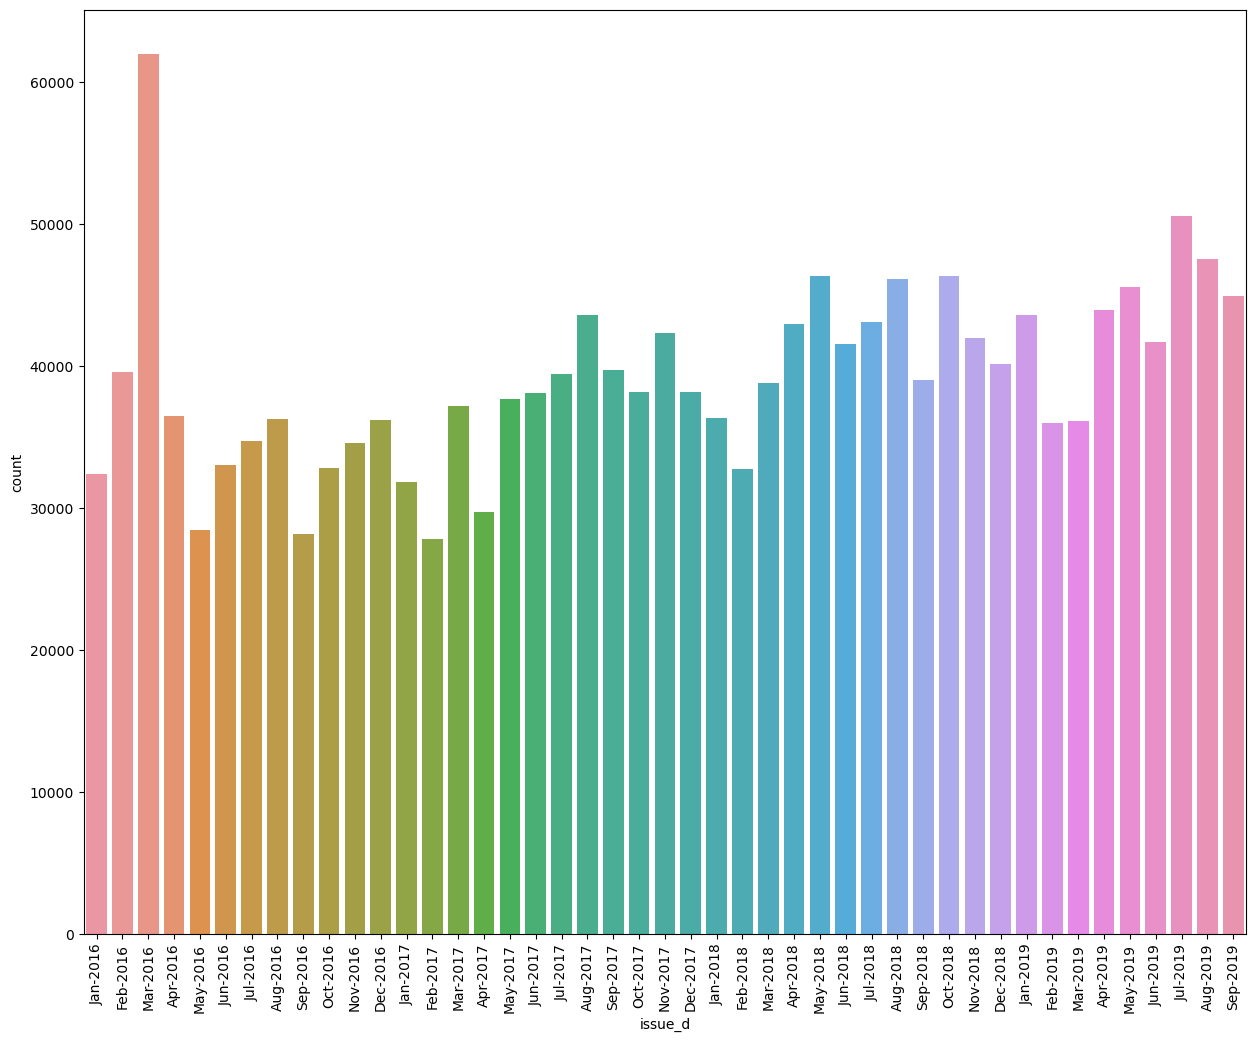

In [45]:
plt.figure(figsize=(15,12))
sns.countplot(x='issue_d',data=mergeddata) #order = sorted(mergeddata['issue_d'].unique()))
plt.xticks(rotation=90)


# Question 1 What percentage of loans issued in each of these months defaulted?

In [46]:
mergeddata['default_amnt'] = ((mergeddata['loan_amnt'] - mergeddata['total_rec_prncp']))
display(mergeddata)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,delinq_amnt,mort_acc,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,0,3,277748,105716,20500,90253,2016,1,18018.96,75.079000
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,0,1,159779,46885,35500,36030,2016,1,0.00,0.000000
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,0,3,63851,46225,2300,45551,2016,1,0.00,0.000000
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,0,0,76492,61418,24500,49956,2016,1,0.00,0.000000
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,0,4,32300,22946,15800,10000,2016,1,15220.38,76.101900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,0,0,155416,38615,109300,44416,2019,9,4509.52,90.190400
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,0,0,60200,18950,46200,12500,2019,9,20365.35,92.569773
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,0,0,46900,17233,11300,18000,2019,9,24237.87,92.865402
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,0,0,18600,8918,15300,0,2019,9,9060.14,90.601400


In [47]:
mergeddata['default_rate'] = ((mergeddata['loan_amnt'] - mergeddata['total_rec_prncp'])/ mergeddata['loan_amnt'])*100
display(mergeddata)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,delinq_amnt,mort_acc,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,0,3,277748,105716,20500,90253,2016,1,18018.96,75.079000
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,0,1,159779,46885,35500,36030,2016,1,0.00,0.000000
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,0,3,63851,46225,2300,45551,2016,1,0.00,0.000000
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,0,0,76492,61418,24500,49956,2016,1,0.00,0.000000
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,0,4,32300,22946,15800,10000,2016,1,15220.38,76.101900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,0,0,155416,38615,109300,44416,2019,9,4509.52,90.190400
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,0,0,60200,18950,46200,12500,2019,9,20365.35,92.569773
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,0,0,46900,17233,11300,18000,2019,9,24237.87,92.865402
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,0,0,18600,8918,15300,0,2019,9,9060.14,90.601400


In [52]:
mergeddata = mergeddata.sort_values(by = ['issue_d_year', 'issue_d_month'])
mergeddata.groupby('issue_d')['default_rate'].mean()

issue_d
Apr-2016    15.468489
Apr-2017    26.364914
Apr-2018    52.720719
Apr-2019    87.781205
Aug-2016    17.201401
Aug-2017    33.233046
Aug-2018    63.420287
Aug-2019    87.730719
Dec-2016    20.161664
Dec-2017    42.548232
Dec-2018    75.146275
Feb-2016    15.509974
Feb-2017    23.084397
Feb-2018    47.096740
Feb-2019    81.678241
Jan-2016    15.336799
Jan-2017    20.974506
Jan-2018    44.193649
Jan-2019    78.109567
Jul-2016    17.396801
Jul-2017    31.850000
Jul-2018    60.523082
Jul-2019    84.620768
Jun-2016    15.835564
Jun-2017    29.974340
Jun-2018    57.947833
Jun-2019    93.619086
Mar-2016    16.085637
Mar-2017    24.196384
Mar-2018    49.547152
Mar-2019    84.640461
May-2016    15.919089
May-2017    28.194088
May-2018    55.282687
May-2019    90.770069
Nov-2016    19.050895
Nov-2017    39.904088
Nov-2018    72.473085
Oct-2016    17.286370
Oct-2017    38.002122
Oct-2018    69.654289
Sep-2016    17.315778
Sep-2017    37.338071
Sep-2018    66.830067
Sep-2019    90.858654
Na

# Question 2 - Loan Category and what are top five loan categories for 2016,2017& 2018

In [35]:
count_df = mergeddata.groupby(['issue_d_year','purpose'])[['loan_amnt']].sum()
count_df.reset_index(inplace=True)
count_df_2016 = count_df.loc[count_df['issue_d_year'] == 2016].nlargest(5, ['loan_amnt'])
count_df_2017 = count_df.loc[count_df['issue_d_year'] == 2017].nlargest(5, ['loan_amnt'])
count_df_2018 = count_df.loc[count_df['issue_d_year'] == 2018].nlargest(5, ['loan_amnt'])
display(count_df_2016.append(count_df_2017).append(count_df_2018))

C:\Users\User\AppData\Local\Temp\ipykernel_22636\995609450.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(count_df_2016.append(count_df_2017).append(count_df_2018))
C:\Users\User\AppData\Local\Temp\ipykernel_22636\995609450.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(count_df_2016.append(count_df_2017).append(count_df_2018))


,issue_d_year,purpose,loan_amnt
2,2016,debt_consolidation,3904078975
1,2016,credit_card,1393891775
3,2016,home_improvement,444422475
8,2016,other,283765425
5,2016,major_purchase,125382875
15,2017,debt_consolidation,3926847225
14,2017,credit_card,1364811275
17,2017,home_improvement,506094600
22,2017,other,338286475
19,2017,major_purchase,144659725


# Question 2- Default rate for each of the loan categories

In [41]:
default_mean = mergeddata.groupby(['issue_d_year','purpose'])[['default_rate']].mean()
default_mean.reset_index(inplace=True)
display(default_mean)

,issue_d_year,purpose,default_rate
0,2016,car,11.774166
1,2016,credit_card,15.066617
2,2016,debt_consolidation,18.080109
3,2016,home_improvement,15.070560
4,2016,house,18.708642
5,2016,major_purchase,15.155189
6,2016,medical,16.298049
7,2016,moving,15.940027
8,2016,other,14.877904
9,2016,renewable_energy,17.210206


# Question 2- Most risky Loan categories

In [42]:
default_mean = mergeddata.groupby(['issue_d_year','purpose'])[['default_rate']].mean()
default_mean.reset_index(inplace=True)
default_mean_2016 = default_mean.loc[count_df['issue_d_year'] == 2016].nlargest(3, ['default_rate'])
default_mean_2017 = default_mean.loc[count_df['issue_d_year'] == 2017].nlargest(3, ['default_rate'])
default_mean_2018 = default_mean.loc[count_df['issue_d_year'] == 2018].nlargest(3, ['default_rate'])
display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))

C:\Users\User\AppData\Local\Temp\ipykernel_22636\3308619919.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))
C:\Users\User\AppData\Local\Temp\ipykernel_22636\3308619919.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))


,issue_d_year,purpose,default_rate
10,2016,small_business,21.385645
4,2016,house,18.708642
2,2016,debt_consolidation,18.080109
26,2017,wedding,65.042235
24,2017,small_business,36.977605
18,2017,house,33.634386
37,2018,small_business,61.762553
28,2018,credit_card,61.085802
29,2018,debt_consolidation,61.048371


# Question 2- Least risky Loan categories

In [43]:
default_mean = mergeddata.groupby(['issue_d_year','purpose'])[['default_rate']].mean()
default_mean.reset_index(inplace=True)
default_mean_2016 = default_mean.loc[count_df['issue_d_year'] == 2016].nsmallest(5, ['default_rate'])
default_mean_2017 = default_mean.loc[count_df['issue_d_year'] == 2017].nsmallest(5, ['default_rate'])
default_mean_2018 = default_mean.loc[count_df['issue_d_year'] == 2018].nsmallest(5, ['default_rate'])
display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))

C:\Users\User\AppData\Local\Temp\ipykernel_22636\2776220354.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))
C:\Users\User\AppData\Local\Temp\ipykernel_22636\2776220354.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(default_mean_2016.append(default_mean_2017).append(default_mean_2018))


,issue_d_year,purpose,default_rate
12,2016,wedding,3.249542
0,2016,car,11.774166
11,2016,vacation,12.802963
8,2016,other,14.877904
1,2016,credit_card,15.066617
16,2017,educational,0.000000
25,2017,vacation,25.574465
13,2017,car,27.031205
17,2017,home_improvement,30.339009
20,2017,medical,30.514083


# Question 3 - Univariate between FICO Score and Debt-income ratio(dti)

In [53]:
mergeddata['Avg_FICO_Score'] = 0.5*(mergeddata['fico_range_high'] + mergeddata['fico_range_low'])
display(mergeddata)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,mort_acc,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate,Avg_FICO_Score
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,3,277748,105716,20500,90253,2016,1,18018.96,75.079000,672.0
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,1,159779,46885,35500,36030,2016,1,0.00,0.000000,742.0
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,3,63851,46225,2300,45551,2016,1,0.00,0.000000,662.0
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,0,76492,61418,24500,49956,2016,1,0.00,0.000000,667.0
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,4,32300,22946,15800,10000,2016,1,15220.38,76.101900,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,0,155416,38615,109300,44416,2019,9,4509.52,90.190400,747.0
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,0,60200,18950,46200,12500,2019,9,20365.35,92.569773,707.0
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,0,46900,17233,11300,18000,2019,9,24237.87,92.865402,747.0
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,0,18600,8918,15300,0,2019,9,9060.14,90.601400,667.0


In [60]:
mergeddata['monthly_income'] = (mergeddata['annual_inc']/12)
display(mergeddata)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate,Avg_FICO_Score,monthly_income
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,277748,105716,20500,90253,2016,1,18018.96,75.079000,672.0,8166.666667
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,159779,46885,35500,36030,2016,1,0.00,0.000000,742.0,5125.000000
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,63851,46225,2300,45551,2016,1,0.00,0.000000,662.0,13065.250000
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,76492,61418,24500,49956,2016,1,0.00,0.000000,667.0,7562.500000
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,32300,22946,15800,10000,2016,1,15220.38,76.101900,667.0,4583.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,155416,38615,109300,44416,2019,9,4509.52,90.190400,747.0,4916.666667
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,60200,18950,46200,12500,2019,9,20365.35,92.569773,707.0,6000.000000
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,46900,17233,11300,18000,2019,9,24237.87,92.865402,747.0,3500.000000
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,18600,8918,15300,0,2019,9,9060.14,90.601400,667.0,3700.000000


In [72]:
mergeddata['dti'] = (mergeddata['installment']/mergeddata['monthly_income'])*100
display(mergeddata)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_d_year,issue_d_month,default_amnt,default_rate,Avg_FICO_Score,monthly_income,dti
98716,24000,24000,24000.0,60 months,18.99%,622.45,D,D4,MORTGAGE,98000.0,...,105716,20500,90253,2016,1,18018.96,75.079000,672.0,8166.666667,7.621837
98718,12000,12000,12000.0,60 months,19.53%,314.80,D,D5,MORTGAGE,61500.0,...,46885,35500,36030,2016,1,0.00,0.000000,742.0,5125.000000,6.142439
98722,5000,5000,5000.0,36 months,18.99%,183.26,D,D4,MORTGAGE,156783.0,...,46225,2300,45551,2016,1,0.00,0.000000,662.0,13065.250000,1.402652
98726,8400,8400,8400.0,36 months,11.99%,278.97,C,C1,RENT,90750.0,...,61418,24500,49956,2016,1,0.00,0.000000,667.0,7562.500000,3.688860
98740,20000,20000,20000.0,60 months,15.31%,479.06,C,C5,RENT,55000.0,...,22946,15800,10000,2016,1,15220.38,76.101900,667.0,4583.333333,10.452218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65309,5000,5000,5000.0,36 months,13.08%,168.67,B,B5,RENT,59000.0,...,38615,109300,44416,2019,9,4509.52,90.190400,747.0,4916.666667,3.430576
69745,22000,22000,22000.0,36 months,8.19%,691.33,A,A4,OWN,72000.0,...,18950,46200,12500,2019,9,20365.35,92.569773,707.0,6000.000000,11.522167
76020,26100,26100,26100.0,36 months,11.02%,854.73,B,B2,RENT,42000.0,...,17233,11300,18000,2019,9,24237.87,92.865402,747.0,3500.000000,24.420857
78248,10000,10000,10000.0,36 months,15.24%,347.83,C,C2,OWN,44400.0,...,8918,15300,0,2019,9,9060.14,90.601400,667.0,3700.000000,9.400811


In [83]:
mergeddata.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [97]:
from statsmodels.regression.linear_model import OLS

x= mergeddata ['installment']
y= mergeddata ['Avg_FICO_Score']

res = OLS(y,x).fit()
# Get Coefficients
coeffs_ols = res.params
print(f'coefficients : {coeffs_ols}')

# Prediction
ols_preds= res.predict()

# Model summary
res.summary()

coefficients : installment    1.114325
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Avg_FICO_Score   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                          4.596e+06
Date:                Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                        02:43:34   Log-Likelihood:                     -1.2934e+07
No. Observations:             1763061   AIC:                                  2.587e+07
Df Residuals:                 1763060   BIC:                                  2.587e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
installment     1.1143      0.001   2143.812      0.000       1.113       1.115
==============================================================================
Omnibus:                   210238.804   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           293367.311
Skew:                          -0.965   Prob(JB):                         0.00
Kurtosis:                       3.515   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
from statsmodels.regression.linear_model import OLS

X= mergeddata ['dti']
Y= mergeddata ['Avg_FICO_Score']

res = OLS(Y,X).fit()
# Get Coefficients
coeffs_ols = res.params
print(f'coefficients : {coeffs_ols}')

# Prediction
ols_preds= res.predict()

# Model summary
res.summary()

MissingDataError: exog contains inf or nans

In [92]:
from statsmodels.regression.linear_model import OLS

x1= mergeddata [['loan_amnt','monthly_income','installment','total_acc','tot_cur_bal','tot_coll_amt']]
y1= mergeddata ['Avg_FICO_Score']

res = OLS(y1,x1).fit()
# Get Coefficients
coeffs_ols = res.params
print(f'coefficients : {coeffs_ols}')

# Prediction
ols_preds= res.predict()

# Model summary
res.summary()

coefficients : loan_amnt          0.002833
monthly_income     0.002376
installment        0.408605
total_acc         15.282742
tot_cur_bal       -0.000054
tot_coll_amt       0.000383
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Avg_FICO_Score   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                          1.615e+06
Date:                Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                        02:39:40   Log-Likelihood:                     -1.2415e+07
No. Observations:             1763061   AIC:                                  2.483e+07
Df Residuals:                 1763055   BIC:                                  2.483e+07
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
loan_amnt          0.0028   6.51e-05     43.495      0.000       0.003       0.003
monthly_income     0.0024   1.99e-05    119.356      0.000       0.002       0.002
installment        0.4086      0.002    185.340      0.000       0.404       0.413
total_acc         15.2827      0.014   1072.376      0.000      15.255      15.311
tot_cur_bal    -5.445e-05    1.4e-06    -38.943      0.000   -5.72e-05   -5.17e-05
tot_coll_amt       0.0004   3.24e-05     11.826      0.000       0.000       0.000
==============================================================================
Omnibus:                   770523.608   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         82126544.991
Skew:                          -1.146   Prob(JB):                         0.00
Kurtosis:                      36.357   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""